# Titanic Classifier

As the starting project for most machine learning practioners, this project aims to make a classifier that predicts whether individuals on the titanic lived or died based on certain personal characteristics. (age, sex, siblings, etc.)

# Preprocessing

Import the titanic dataset and clean it.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os


In [2]:
#Remove irrelevent features, fill NaN, reset index, set dtypes
titanic = pd.read_csv('titanic_train.csv')
del titanic['Name']
del titanic['Cabin']
del titanic['Ticket']
titanic = titanic.set_index('PassengerId')
titanic = titanic.fillna('0')
titanic.Age = titanic.Age.astype('int64')
titanic.head()

"""
#method to perform onehotencoding within pandas
titanicdumm = pd.get_dummies(titanic)
titanicdumm.head()

x= pd.cut(titanic.Fare, [0,15,31,150, 600], labels = [0, 1, 2, 3])
x = pd.get_dummies(x)
x.columns  = ['poor','middle', 'rich', 'moneybags']
frames = [titanicdumm, x]
titanic = pd.concat(frames, axis = 1)
del titanic['Fare']
titanic.head()"""

#Change categorical variables to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic.Sex = le.fit_transform(titanic.Sex)
titanic.Embarked = le.fit_transform(titanic.Embarked)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22,1,0,7.2500,3
2,1,1,0,38,1,0,71.2833,1
3,1,3,0,26,0,0,7.9250,3
4,1,1,0,35,1,0,53.1000,3
5,0,3,1,35,0,0,8.0500,3


Lets do some preliminary visualization to get a feel for our data. We are looking out for linear dependencies and possible feature interactions.

# Data Analysis

In [3]:
df = titanic.drop(['Pclass','Parch','Fare'], axis = 1)

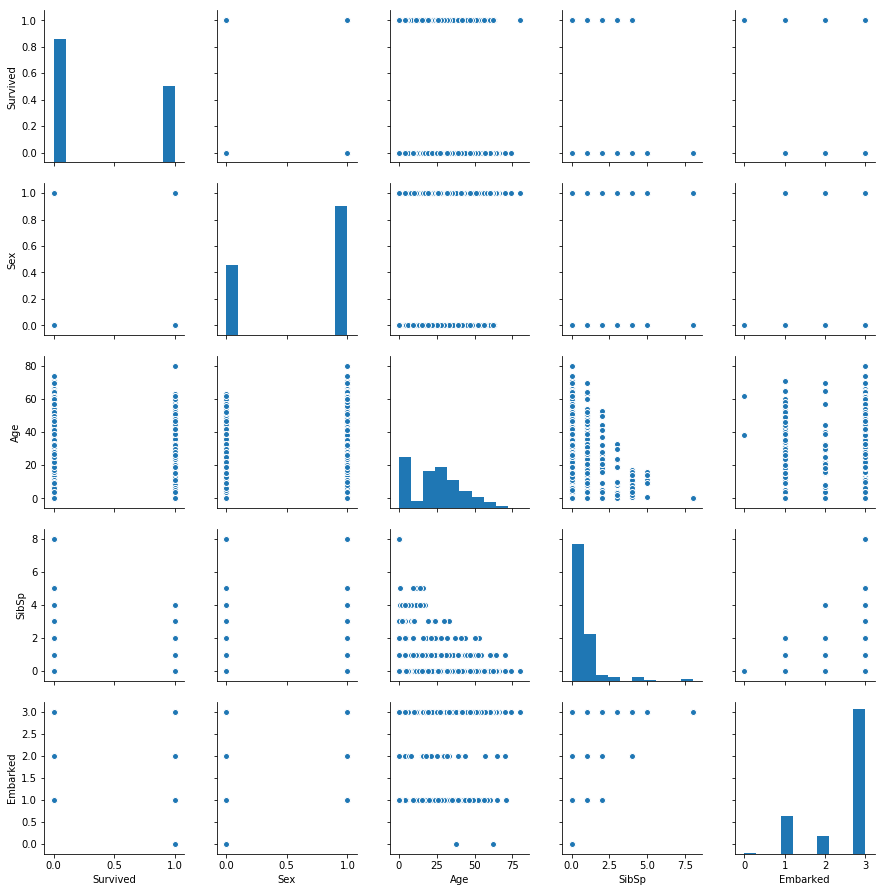

In [4]:
sns.pairplot(df)

### Things to look at:

Look at the distribution of age... a lot of babies.

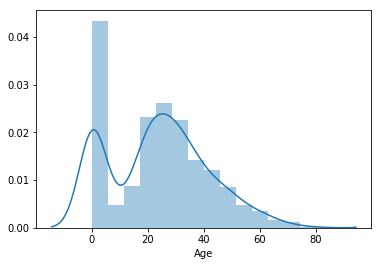

In [5]:
sns.distplot(df['Age'])

# Logisitic Regression

### Dump all the data into a logistic regression classifier

In [6]:
#Use all features in train test split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X = titanic.iloc[:,1:]
y = titanic.iloc[:,0]
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.1)

#instantiate logistic regressor and fit to training data. Accuracy_score is testing measure.
from sklearn.linear_model import LogisticRegression
log  = LogisticRegression(random_state =0)
c= cross_val_score(log, X, y, cv = 10).mean()
print('Logistic Regression Out of Sample Accuracy:', c*100, '%')

Logistic Regression Out of Sample Accuracy: 78.2849468667 %


### Will changing feature inputs boost accuracy?

Use random choice of 2 or 3 features, score the fitted model, and ouput the results.



In [7]:
all_features = list(range(0,7))
res = 0
cols = None
#10 models of 3 features each.
for _ in range(0,10):
    x = list(np.random.choice(all_features, 3, replace = False))
    l = LogisticRegression()
    t=  cross_val_score(l, X, y, cv = 10).mean()
    if t > res:
        res = t
        cols = X.iloc[:,x].columns.values
    if t == res:
        print('Other winners:', X.iloc[:,x].columns.values, 'at', t)
        
print("The heighest scoring 3 feature combo: ", cols, res)

Other winners: ['Sex' 'Fare' 'Parch'] at 0.782849468667
Other winners: ['Sex' 'Embarked' 'Pclass'] at 0.782849468667
Other winners: ['Pclass' 'Embarked' 'Fare'] at 0.782849468667
Other winners: ['Fare' 'Age' 'Pclass'] at 0.782849468667
Other winners: ['Embarked' 'Sex' 'Pclass'] at 0.782849468667
Other winners: ['Age' 'SibSp' 'Pclass'] at 0.782849468667
Other winners: ['SibSp' 'Age' 'Pclass'] at 0.782849468667
Other winners: ['Sex' 'Pclass' 'Age'] at 0.782849468667
Other winners: ['Parch' 'Sex' 'Age'] at 0.782849468667
Other winners: ['Sex' 'SibSp' 'Pclass'] at 0.782849468667
The heighest scoring 3 feature combo:  ['Sex' 'Fare' 'Parch'] 0.782849468667


In [8]:
res = 0
cols = None
#30 models of 2 features each.
for _ in range(0,30):
    x = list(np.random.choice(all_features, 2, replace = False))
    l = LogisticRegression()
    t=  cross_val_score(l, X, y, cv = 10).mean()
    if t > res:
        res = t
        cols = X.iloc[:,x].columns.values
    if t == res:
        print('Other winners:', X.iloc[:,x].columns.values, 'at', t)
        
print("The heighest scoring 2 feature combo: ", cols, res)

Other winners: ['Pclass' 'Fare'] at 0.782849468667
Other winners: ['Age' 'SibSp'] at 0.782849468667
Other winners: ['Embarked' 'Sex'] at 0.782849468667
Other winners: ['Parch' 'Fare'] at 0.782849468667
Other winners: ['Parch' 'Fare'] at 0.782849468667
Other winners: ['Fare' 'Pclass'] at 0.782849468667
Other winners: ['SibSp' 'Fare'] at 0.782849468667
Other winners: ['Fare' 'Age'] at 0.782849468667
Other winners: ['SibSp' 'Embarked'] at 0.782849468667
Other winners: ['SibSp' 'Fare'] at 0.782849468667
Other winners: ['Parch' 'Age'] at 0.782849468667
Other winners: ['Embarked' 'Pclass'] at 0.782849468667
Other winners: ['SibSp' 'Pclass'] at 0.782849468667
Other winners: ['Fare' 'SibSp'] at 0.782849468667
Other winners: ['Age' 'Embarked'] at 0.782849468667
Other winners: ['Pclass' 'Parch'] at 0.782849468667
Other winners: ['SibSp' 'Fare'] at 0.782849468667
Other winners: ['Fare' 'Embarked'] at 0.782849468667
Other winners: ['SibSp' 'Parch'] at 0.782849468667
Other winners: ['Sex' 'Age'] at

## Final Logistic Regression

I will choose a logistic regression with the features [Sex, Sibsp]. Mainly because: they scored well consistently, its a simple model, and it can be visualized.

In [9]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X.iloc[:,[1,3]],y)
logistic_classifier.score(X_test.iloc[:,[1,3]], y_test)

0.77777777777777779

## Visualized
Here is the decision boundary for our linear classifier.

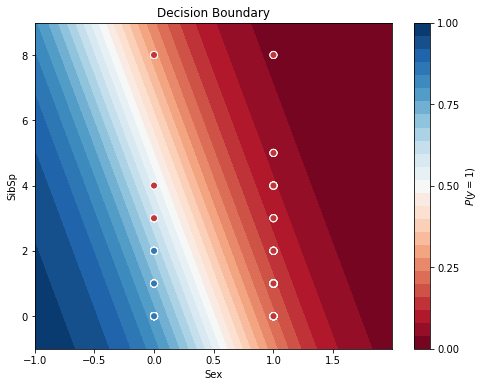

In [10]:
os.chdir('C:\\Users\\Harrison\\Documents\\GitHub\\ML-Notes')
from VisualFuncs import Visual_Logistic
Visual_Logistic(X.iloc[:,[1,3]], y, logistic_classifier)

## With LDA
Can we improve the model by Linear Discriminant Analysis at the cost of interpretability?
Probably not since we are dealing with a bunch of categorical data, but it is good practice, so lets do it.


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
X_lda = lda.transform(X)



l = LogisticRegression(random_state = 0)

b= cross_val_score(l, X_lda, y, cv = 10).mean()

print('old score: ', c)
print('new score: ', b)


old score:  0.782849468667
new score:  0.786630332865


Cool

# Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0)
a = cross_val_score(tree, X, y, cv = 10).mean()
print ('Decision Tree Accuracy on Train Set', a*100, '%')

Decision Tree Accuracy on Train Set 78.8975621191 %


In [15]:
res = 0
cols = None
#10 models of 3 features each.
for _ in range(0,10):
    x = list(np.random.choice(all_features, 3, replace = False))
    l = LogisticRegression()
    t=  cross_val_score(l, X, y, cv = 10).mean()
    if t > res:
        res = t
        cols = X.iloc[:,x].columns.values
    if t == res:
        print('Other winners:', X.iloc[:,x].columns.values, 'at', t)
        
print("The heighest scoring 3 feature combo: ", cols, res)

Other winners: ['Sex' 'Embarked' 'Pclass'] at 0.782849468667
Other winners: ['Pclass' 'Fare' 'SibSp'] at 0.782849468667
Other winners: ['Pclass' 'Fare' 'Sex'] at 0.782849468667
Other winners: ['Fare' 'Embarked' 'Pclass'] at 0.782849468667
Other winners: ['Parch' 'Sex' 'SibSp'] at 0.782849468667
Other winners: ['Embarked' 'Fare' 'SibSp'] at 0.782849468667
Other winners: ['Age' 'Sex' 'SibSp'] at 0.782849468667
Other winners: ['Embarked' 'Sex' 'Age'] at 0.782849468667
Other winners: ['Embarked' 'SibSp' 'Parch'] at 0.782849468667
Other winners: ['Age' 'Sex' 'SibSp'] at 0.782849468667
The heighest scoring 3 feature combo:  ['Sex' 'Embarked' 'Pclass'] 0.782849468667


#### Input = [Sex,  Age, SibSp]


In [ ]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train.iloc[:,[0,1,2]], y_train)
tree.score(X_test.iloc[:,[0,1,2]], y_test)


Good boost! now lets try just Sex and SibSp

#### Input = [Sex, SibSp]

In [ ]:
tree = DecisionTreeClassifier(max_depth=1,random_state = 0)
tree.fit(X_train.iloc[:,[0,2]], y_train)
tree.score(X_test.iloc[:,[0,2]], y_test)


In [ ]:
import os
os.chdir('C:\\Users\\Harrison\\Documents\\GitHub\\ML-Notes\\Titanic')

# K Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X_test, y_test, cv = 4)

print('tree score: ', scores.mean())